In [1]:
import xarray as xr
import gcsfs
ds_faces = xr.open_zarr(gcsfs.GCSMap('pangeo-data/ECCO.zarr'))

In [2]:
!pip install fsspec zarr git+https://github.com/xgcm/xmitgcm.git
#!pip install git+https://github.com/xgcm/xmitgcm.git

  Cloning https://github.com/xgcm/xmitgcm.git to /tmp/pip-req-build-456j9p8i
  Running command git clone -q https://github.com/xgcm/xmitgcm.git /tmp/pip-req-build-456j9p8i
  Stored in directory: /tmp/pip-ephem-wheel-cache-rjus_5fd/wheels/30/56/4a/2f821dca91af662f964a983b3855243a9de61945c506ee888e
Successfully built xmitgcm
  Found existing installation: xmitgcm 0.3.0+5.gbd93afd
    Uninstalling xmitgcm-0.3.0+5.gbd93afd:
      Successfully uninstalled xmitgcm-0.3.0+5.gbd93afd


In [3]:
pip install fsspec zarr git+https://github.com/cspencerjones/xmitgcm@metric

  Cloning https://github.com/cspencerjones/xmitgcm (to revision metric) to /tmp/pip-req-build-vrmok3r1
  Running command git clone -q https://github.com/cspencerjones/xmitgcm /tmp/pip-req-build-vrmok3r1
  Running command git checkout -b metric --track origin/metric
  Switched to a new branch 'metric'
  Branch 'metric' set up to track remote branch 'metric' from 'origin'.
  Stored in directory: /tmp/pip-ephem-wheel-cache-tdexle_q/wheels/22/62/a2/2a606a4faba7cb0fa2ea3e034f256b73854ddba4eea1ef406d
Successfully built xmitgcm
  Found existing installation: xmitgcm 0.3.0+4.g5324648
    Uninstalling xmitgcm-0.3.0+4.g5324648:
      Successfully uninstalled xmitgcm-0.3.0+4.g5324648
Note: you may need to restart the kernel to use updated packages.


In [4]:
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
#Apply Ryan's code to the dataset
ds_ll=faces_dataset_to_latlon(ds_faces, metric_vector_pairs=[('LaHw3RHO','LaHs3RHO')])

#Exclude 1992 and put the Atlantic in the middle 
ds = (ds_ll.reset_coords(drop=True).roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

#Make a corresponding dataset of the coordinates of ds, with the same conditions as above(?)
coords = (ds_ll.coords.to_dataset().reset_coords().roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

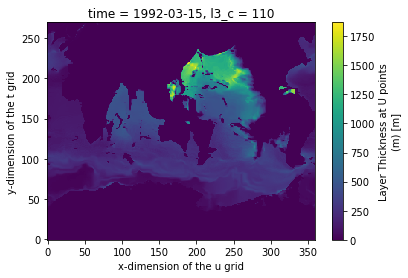

In [36]:
ds.LaHw3RHO.isel(time=1, l3_c=110).plot() #layer depth of one sigma
#isopyncals in pacific are deeper for the same density level 

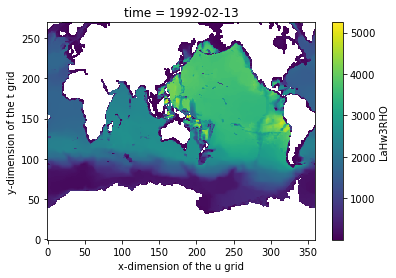

In [39]:
depth_isopycnal=ds.LaHw3RHO[0,:110,:,:].sum('l3_c') #masking the 0 depth 
depth_isopycnal.where(depth_isopycnal>0).plot() 

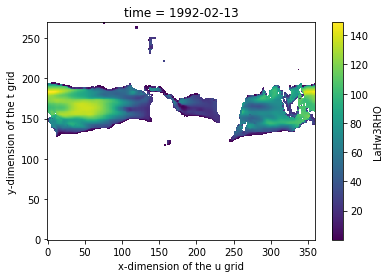

In [42]:
depth_isopycnal=ds.LaHw3RHO[0,:50,:,:].sum('l3_c') #masking the 0 depth - isopycncal only at equator 
depth_isopycnal.where(depth_isopycnal>0).plot() 

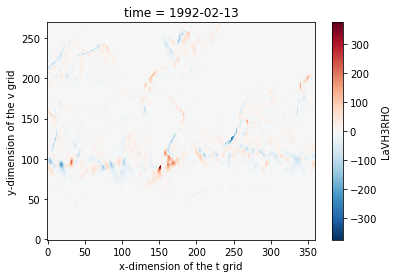

In [43]:
ds.LaVH3RHO[0, :110, :,:].sum('l3_c').plot()

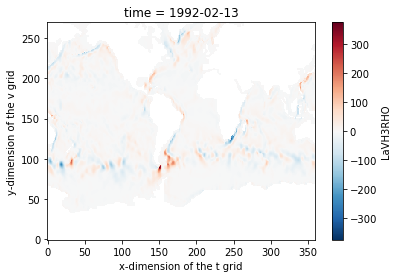

In [44]:
TW_velocity = ds.LaVH3RHO[0, :110, :,:].sum('l3_c')
TW_velocity.where(TW_velocity!=0).plot() #depth integrated velocity above an ispycanl 
#sum over a bunch of isopuyncails of velocity (lavh3rho is v*delta(zeta))
#thickness weighted 

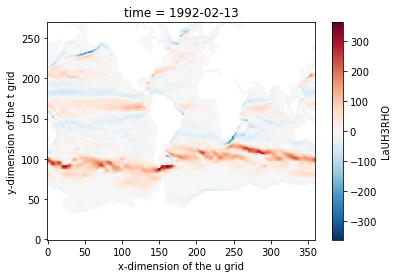

In [47]:
u_velocity = ds.LaUH3RHO[0, :110, :,:].sum('l3_c')
u_velocity.where(TU_velocity!=0).plot()
#analogous plot (to above) of east-westawrd velocity 

/srv/conda/envs/notebook/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


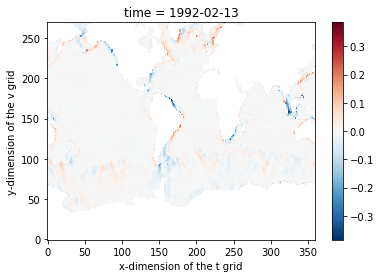

In [50]:
#mean velocity above an isopyncal (thickness averaged )
TA_velocity = (ds.LaVH3RHO[0, :110, :,:].sum('l3_c')) / (ds.LaHs3RHO[0, :110, :,:].sum('l3_c'))
TA_velocity.plot()

In [52]:
ds.LaHs3RHO

<xarray.DataArray 'LaHs3RHO' (time: 9, l3_c: 221, j_g: 270, i: 360)>
dask.array<shape=(9, 221, 270, 360), dtype=float64, chunksize=(1, 1, 1, 90)>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * time     (time) datetime64[ns] 1992-02-13 1992-03-15 ... 1992-10-15
  * l3_c     (l3_c) int64 0 1 2 3 4 5 6 7 8 ... 213 214 215 216 217 218 219 220
Attributes:
    long_name:      Layer Thickness at V points (m)
    mate:           LaHw3RHO
    standard_name:  LaHs3RHO
    units:          m